In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [135]:
df=data = pd.read_csv('/content/Global YouTube Statistics.csv', encoding = 'latin-1')

In [136]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [137]:
df.shape

(995, 28)

In [138]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [139]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [140]:
df.fillna(df.mean(), inplace=True)
cols = ['category', 'Country', 'Abbreviation','channel_type']
df[cols] = df[cols].fillna(value='Unknown')
df

<ipython-input-140-5a4e281f897d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,3.490791e+05,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,7.000000e+05,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3.000000e+05,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Unknown,HybridPanda,2452,United Kingdom,GB,Games,...,1.000000e+03,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,1.000000e+05,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [141]:
df.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              5
created_date                               0
Gross tert

In [142]:
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'
df['Youtuber'] = df['Youtuber'].apply(lambda x: re.sub(pattern, '', x))
df['Youtuber'] = df['Youtuber'].str.strip()
df['Youtuber'] = df['Youtuber'].str.lstrip('- ')

In [143]:
df.reset_index(drop= True, inplace= True)

In [144]:
df['created_year'].unique()

array([2006.        , 2012.        , 2013.        , 2015.        ,
       2010.        , 2016.        , 2018.        , 2014.        ,
       2007.        , 2020.        , 2008.        , 2005.        ,
       2011.        , 2009.        , 2017.        , 2021.        ,
       1970.        , 2019.        , 2012.63030303, 2022.        ])

In [145]:
select_columns = ['Youtuber', 'subscribers']
top_10_subs = df[select_columns].head(10)
top_10_subs['Subscribers (million)'] = (top_10_subs['subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'Subscribers (million)']]
top_10_subs

,Youtuber,Subscribers (million)
0,T-Series,245
1,YouTube Movies,170
2,MrBeast,166
3,Cocomelon - Nursery Rhymes,162
4,SET India,159
5,Music,119
6,Kids Diana Show,112
7,PewDiePie,111
8,Like Nastya,106
9,Vlad and Niki,98


In [146]:
select_columns = ['Youtuber', 'video views']
youtube_videoviews = df[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'video views', ascending= False).head(10)
top_10_views['video views (billion)'] = (top_10_views['video views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'video views (billion)']].sort_values(by= 'video views (billion)', ascending= False).reset_index(drop=True)
top_10_views

,Youtuber,video views (billion)
0,T-Series,228
1,Cocomelon - Nursery Rhymes,164
2,SET India,148
3,Sony SAB,101
4,Kids Diana Show,93
5,Like Nastya,90
6,WWE,77
7,Vlad and Niki,77
8,Zee TV,73
9,Colors TV,61


In [147]:
youtube_color_barchart_10 = ['#f00000','#ff2424','#ff3838','#ff554f','#fb7571','#cccccc','#b6b6b6','#9e9e9e','#888888','#777777']
youtube_color_donutchart = ['#777777','#9e9e9e','#b6b6b6','#cccccc', '#fb7571', '#ff3838','#f00000']
youtube_color_barchart_freestyle1 = ['#f00000', '#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777','#777777']
youtube_color_barchart_freestyle2 = ['#FE0000','#F4E0B9','#A8A196','#7D7463']
youtube_color_barchart_freestyle3 = ['#f00000', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777', '#777777']

In [148]:
statis_category = df.groupby('category').agg({'category' : 'count',
                                                   'uploads' : 'sum',
                                                   'subscribers' : 'sum',
                                                   'video views' : 'sum'
                                                })
statis_category = statis_category.rename(columns= {'category' : 'Count of Category'}).reset_index()
statis_category['video views (billion)'] = (statis_category['video views']/1000000000).astype('int')
statis_category['subscribers (million)'] = (statis_category['subscribers']/1000000).astype('int')
statis_category['uploads (k.)'] = (statis_category['uploads']/1000).astype('int')
statis_category = statis_category[['category', 'Count of Category', 'uploads (k.)','subscribers (million)', 'video views (billion)']] #
statis_category

,category,Count of Category,uploads (k.),subscribers (million),video views (billion)
0,Autos & Vehicles,2,3,35,15
1,Comedy,69,77,1388,550
2,Education,45,141,1194,696
3,Entertainment,241,2869,5158,2527
4,Film & Animation,46,128,1314,544
5,Gaming,94,405,1960,717
6,Howto & Style,40,66,775,201
7,Movies,2,7,51,15
8,Music,202,471,5195,3121
9,News & Politics,26,2924,536,270


<ipython-input-149-9c6428af6c98>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= count_category, x = 'category', y = 'Count of Category', palette= youtube_color_barchart_10)
<ipython-input-149-9c6428af6c98>:10: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= count_category, x = 'category', y = 'Count of Category', palette= youtube_color_barchart_10)


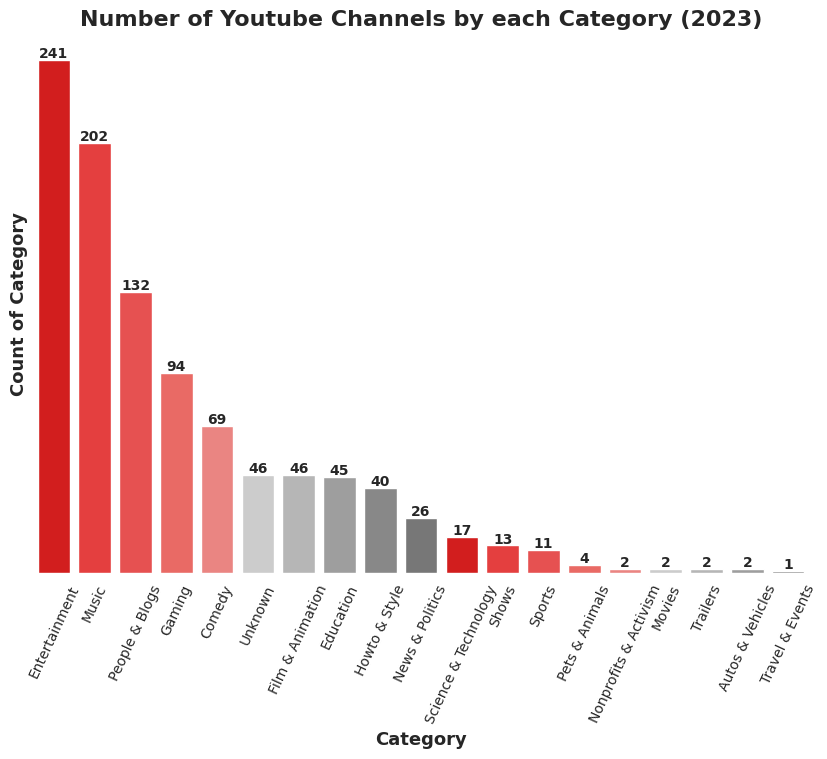

In [149]:
count_category = statis_category[['category', 'Count of Category']].sort_values(by = 'Count of Category', ascending= False).reset_index(drop = True)
count_category.loc[count_category['Count of Category'] < 20, 'Category'] = 'Other'
count_category = count_category.groupby(['category'])['Count of Category'].sum().reset_index().sort_values(by = 'Count of Category', ascending= False)
count_category.reset_index(drop= True, inplace= True)
count_category
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize=(10,7))
cnt_category = count_category['Count of Category'].to_list()
plt.title('Number of Youtube Channels by each Category (2023)', fontsize = 16, fontweight = 'heavy')
sns.barplot(data= count_category, x = 'category', y = 'Count of Category', palette= youtube_color_barchart_10)
for i, value in enumerate(cnt_category):
    plt.text(i, value + 1, cnt_category[i],  ha = 'center', fontsize=10, fontweight = 'heavy')
sns.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('Category', fontsize = 13, fontweight = 'heavy')
plt.ylabel('Count of Category', fontweight = 'heavy', fontsize = 13)
plt.xticks(rotation = 65)
plt.yticks([])
plt.show();

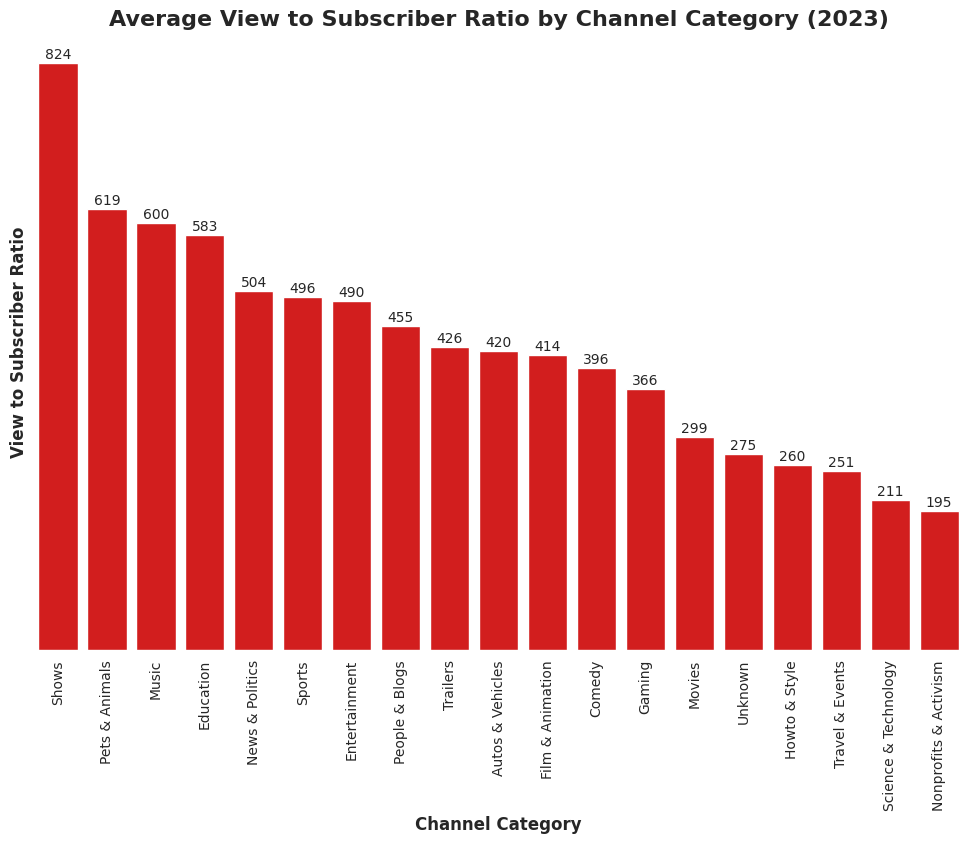

In [150]:
subs_views_category = df.groupby('category').agg({'subscribers' : 'sum',
                                                      'video views' : 'sum'})

#Create View-to-Subscriber Ratio
subs_views_category['View-to-Subscriber Ratio'] = (subs_views_category['video views'] / subs_views_category['subscribers']).astype('int')
subs_views_category.sort_values(by= 'View-to-Subscriber Ratio', ascending= False, inplace= True)
subs_views_category.reset_index( inplace= True)

#Show statistics table
subs_views_category
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (12,8))

#Convert variable to a list
labels = subs_views_category['View-to-Subscriber Ratio'].to_list()

#Chart
plt.title('Average View to Subscriber Ratio by Channel Category (2023)', fontweight = 'heavy', fontsize = 16)
sns.barplot(data= subs_views_category, x = 'category', y = 'View-to-Subscriber Ratio', color = '#f00000') #palette= youtube_color_a
plt.xlabel('Channel Category', fontsize = 12, fontweight = 'heavy')
plt.ylabel('View to Subscriber Ratio', fontsize = 12, fontweight = 'heavy')

#Add label for each columns in chart
for i, value in enumerate(labels):
    plt.text(i, value + 6, labels[i],  ha = 'center', fontsize=10)

sns.despine(left=True, bottom=True)
plt.xticks(rotation = 90)
plt.yticks([])
plt.show();

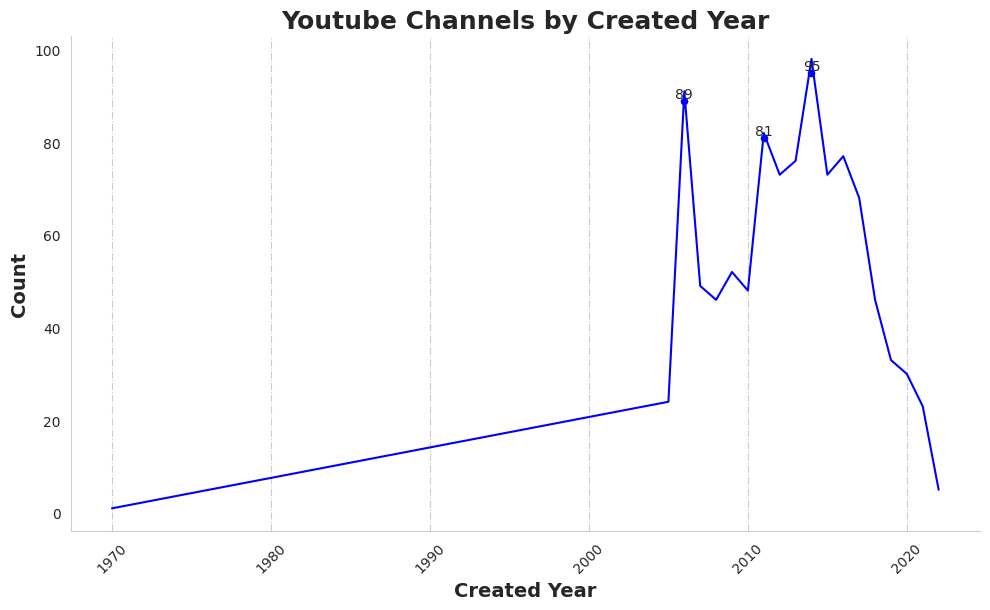

In [151]:
df['created_year'] = df['created_year'].astype(int)
cnt_created_year = df.groupby('created_year').size().to_frame().reset_index().rename(columns= {0 : 'Count'})
cnt_created_year.sort_values(by = 'Count', ascending= False)
sns.set_style("whitegrid",{'axes.grid' : False})
plt.figure( figsize= (10,6))
plt.title('Youtube Channels by Created Year', fontweight = 'heavy', fontsize = 18)
sns.lineplot(data = cnt_created_year, y = 'Count', x = 'created_year', color = 'blue')

label_points = [(2014, 95), (2006, 89), (2011, 81)]
for point in label_points:
    plt.text(point[0], point[1], f'{point[1]}', ha='center', va='bottom')

for point in label_points:
    x, y = point
    plt.scatter(x, y, color='blue', marker='o', s=20)

plt.xlabel('Created Year', fontweight = 'heavy', fontsize = 14)
plt.ylabel('Count', fontweight = 'heavy', fontsize = 14)
sns.despine(left=False, bottom=False)
plt.grid(axis = 'x', linestyle ='-.')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<ipython-input-152-9a8f1b6a5828>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', palette= youtube_color_barchart_10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'T-Series'),
  Text(0, 1, 'YouTube Movies'),
  Text(0, 2, 'MrBeast'),
  Text(0, 3, 'Cocomelon - Nursery Rhymes'),
  Text(0, 4, 'SET India'),
  Text(0, 5, 'Music'),
  Text(0, 6, 'Kids Diana Show'),
  Text(0, 7, 'PewDiePie'),
  Text(0, 8, 'Like Nastya'),
  Text(0, 9, 'Vlad and Niki')])

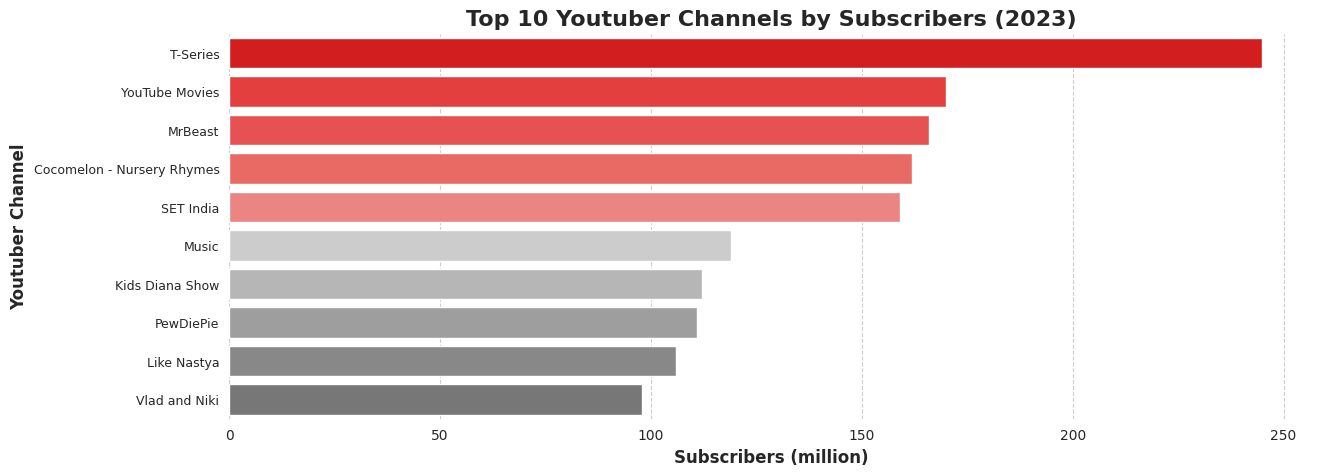

In [152]:
sns.set_style("whitegrid",{'axes.grid' : True})

fig, ax = plt.subplots(1, 1, figsize = (14,5))

sns.barplot(top_10_subs,x = 'Subscribers (million)' ,y = 'Youtuber', palette= youtube_color_barchart_10)
ax.set_title('Top 10 Youtuber Channels by Subscribers (2023)',fontweight = 'heavy', fontsize = 16)
ax.set_xlabel('Subscribers (million)',fontweight = 'heavy', fontsize = 12)
ax.set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax.grid(axis = 'x', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.sca(ax)
plt.yticks(size = 9)

<ipython-input-153-cd2245b0662d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_views,x = 'video views (billion)' ,y = 'Youtuber', palette= youtube_color_barchart_10)


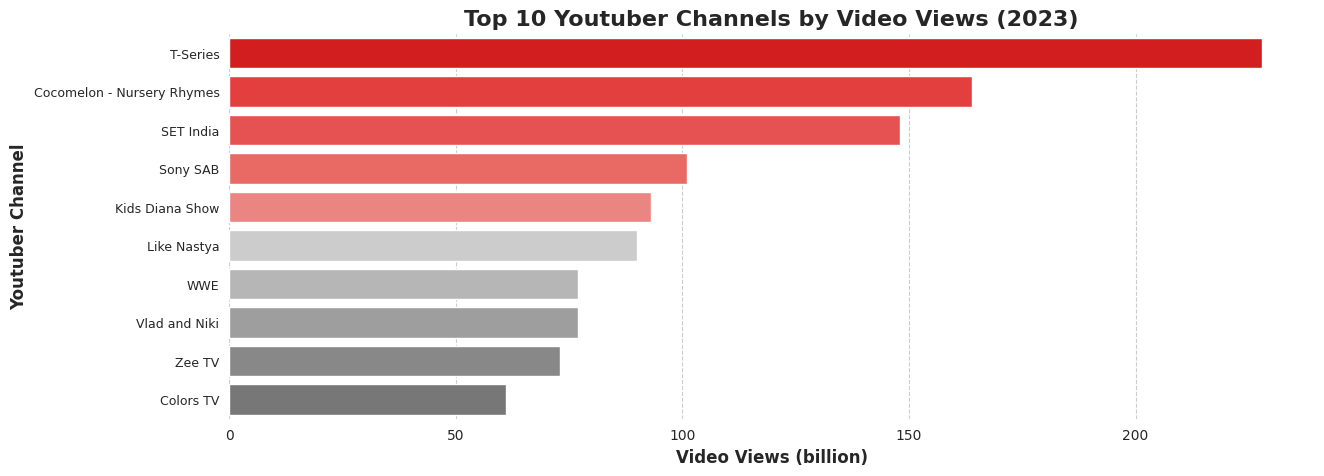

In [153]:
fig, ax = plt.subplots(1, 1, figsize = (14,5))
sns.barplot(top_10_views,x = 'video views (billion)' ,y = 'Youtuber', palette= youtube_color_barchart_10)
ax.set_title('Top 10 Youtuber Channels by Video Views (2023)',fontweight = 'heavy', fontsize = 16)
ax.set_xlabel('Video Views (billion)',fontweight = 'heavy', fontsize = 12)
ax.set_ylabel('Youtuber Channel',fontweight = 'heavy', fontsize = 12)
ax.grid(axis = 'x', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.sca(ax)
plt.yticks(size = 9)

plt.show();


In [154]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

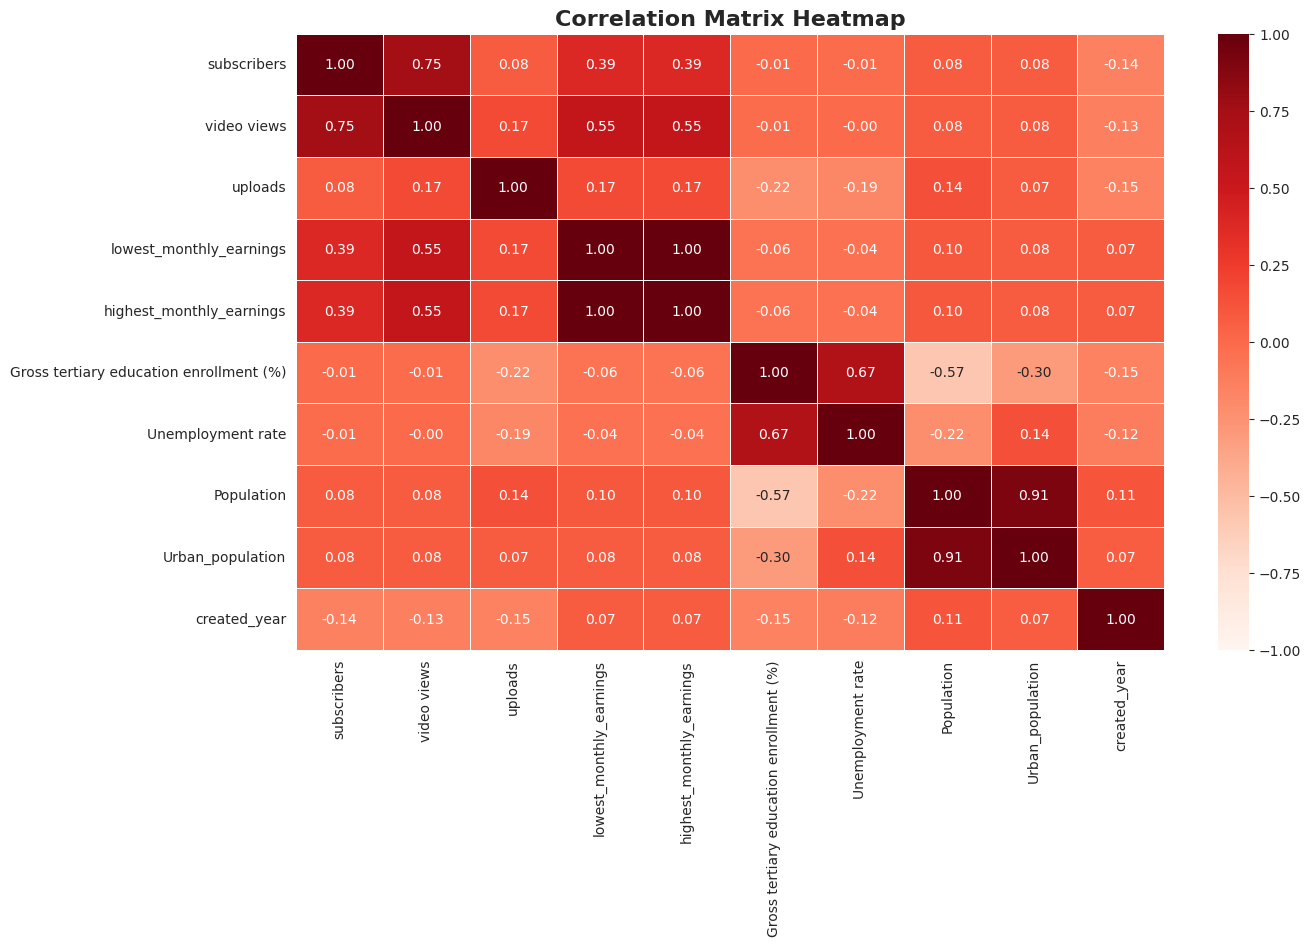

In [155]:
correlation = df[['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Population', 'Urban_population', 'created_year']].corr()
plt.figure(figsize= (14,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True,
           cmap= 'Reds',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()

<ipython-input-156-36f1917edbd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscribers', y='Youtuber', data=df.sort_values(by='subscribers', ascending=False).head(10), palette="viridis")


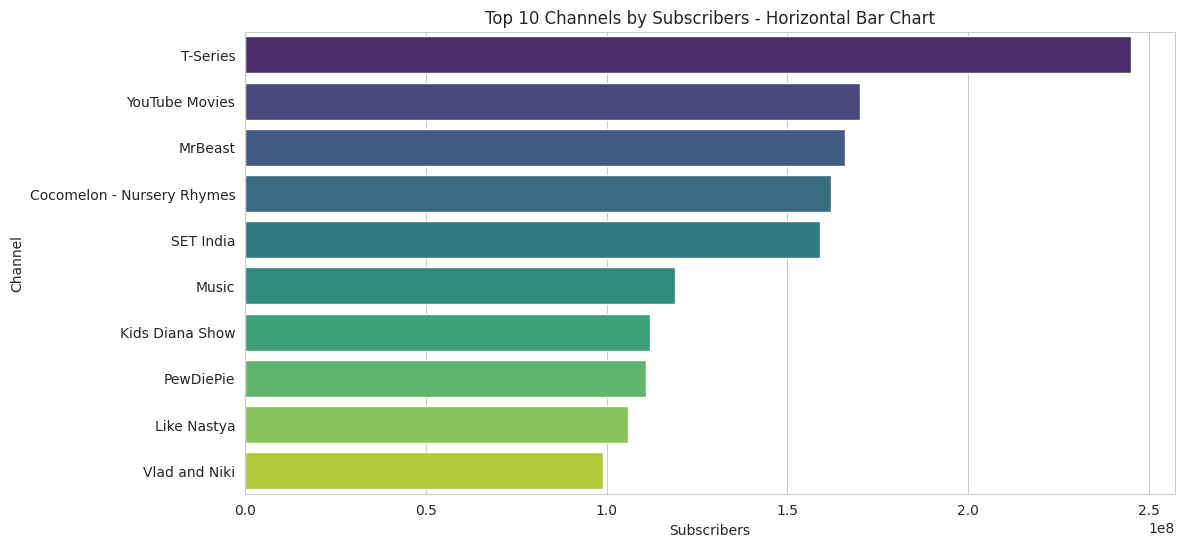

In [156]:
_# 1. Top 10 Channels by Subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='Youtuber', data=df.sort_values(by='subscribers', ascending=False).head(10), palette="viridis")
plt.title('Top 10 Channels by Subscribers - Horizontal Bar Chart')
plt.xlabel('Subscribers')
plt.ylabel('Channel')
plt.show()

<ipython-input-157-63f4698f8c7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video views', y='Youtuber', data=df.sort_values(by='video views', ascending=False).head(10), palette="coolwarm")


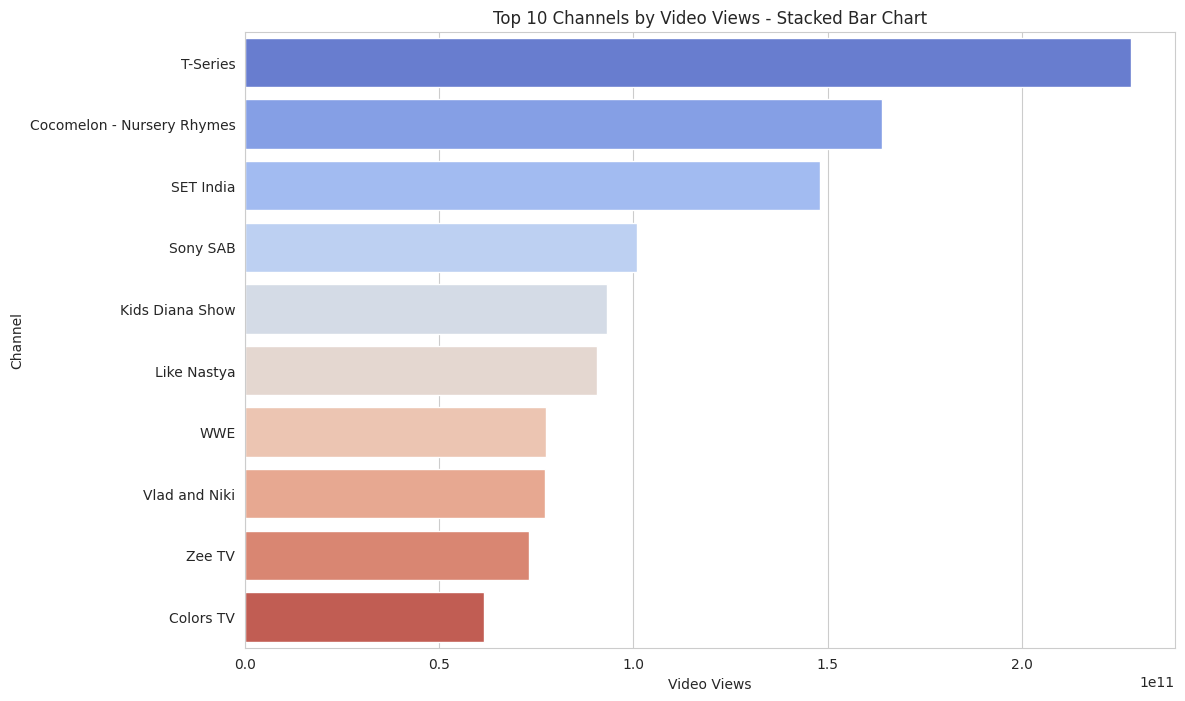

In [157]:
# 2. Top 10 Channels by Video Views
plt.figure(figsize=(12, 8))
sns.barplot(x='video views', y='Youtuber', data=df.sort_values(by='video views', ascending=False).head(10), palette="coolwarm")
plt.title('Top 10 Channels by Video Views - Stacked Bar Chart')
plt.xlabel('Video Views')
plt.ylabel('Channel')
plt.show()

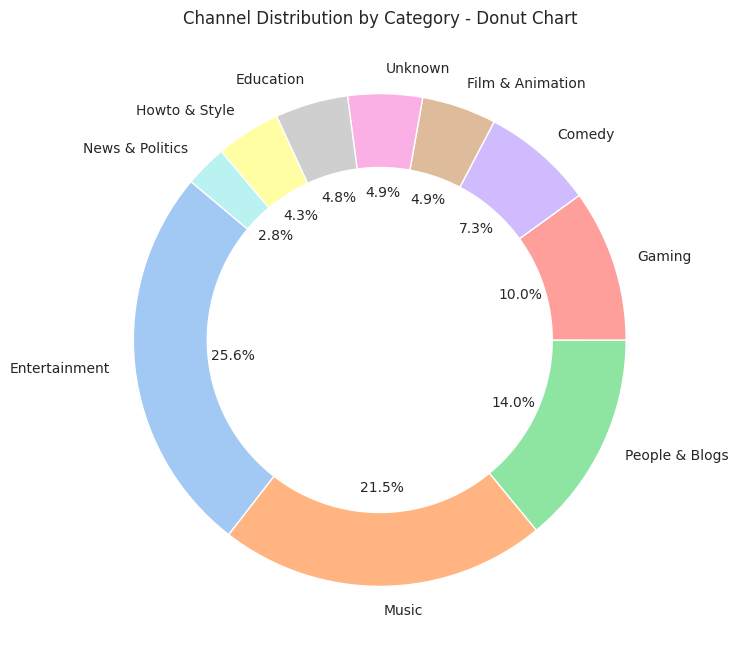

In [158]:
# 3. Channel Distribution by Category
plt.figure(figsize=(10, 8))
category_dist = df['category'].value_counts().head(10)
plt.pie(category_dist, labels=category_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Channel Distribution by Category - Donut Chart')
center_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(center_circle)
plt.show()

<ipython-input-159-5a98b5db832f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_dist.index, x=country_dist.values, palette="coolwarm")


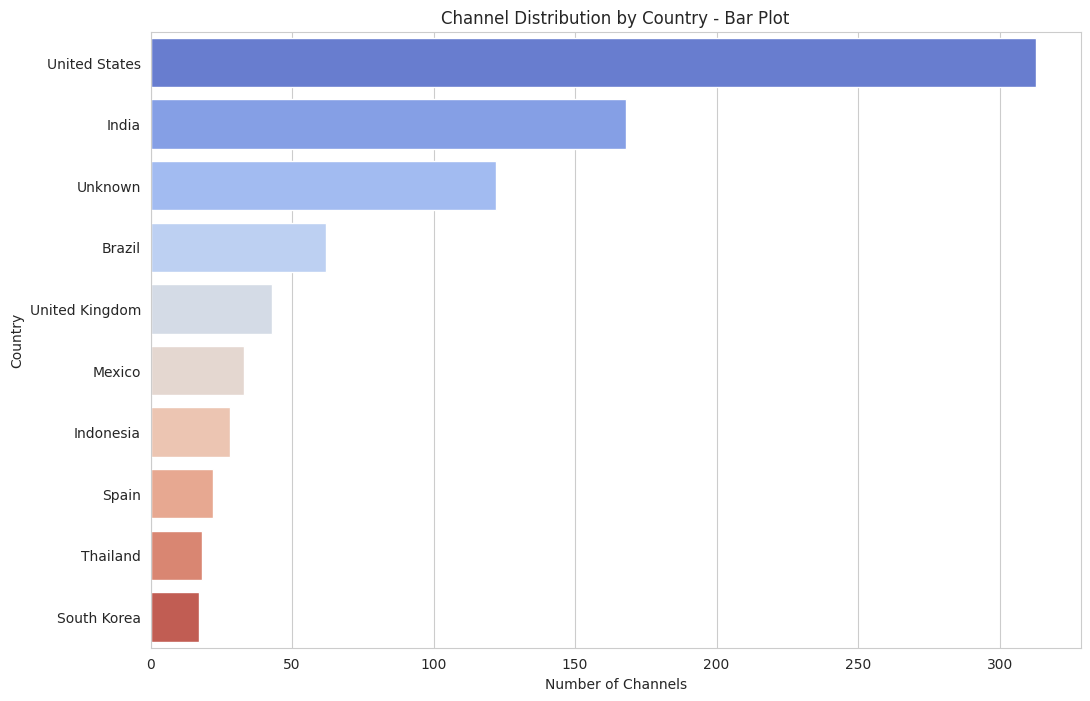

In [159]:
# 4. Channel Distribution by Country
plt.figure(figsize=(12, 8))
country_dist = df['Country'].value_counts().head(10)
sns.barplot(y=country_dist.index, x=country_dist.values, palette="coolwarm")
plt.title('Channel Distribution by Country - Bar Plot')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()

<ipython-input-160-b66e40b748ed>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Youtuber', y='subscribers_for_last_30_days', data=df.sort_values(by='subscribers_for_last_30_days', ascending=False).head(10), size='subscribers_for_last_30_days', sizes=(100, 1000), alpha=0.6, palette="cubehelix")


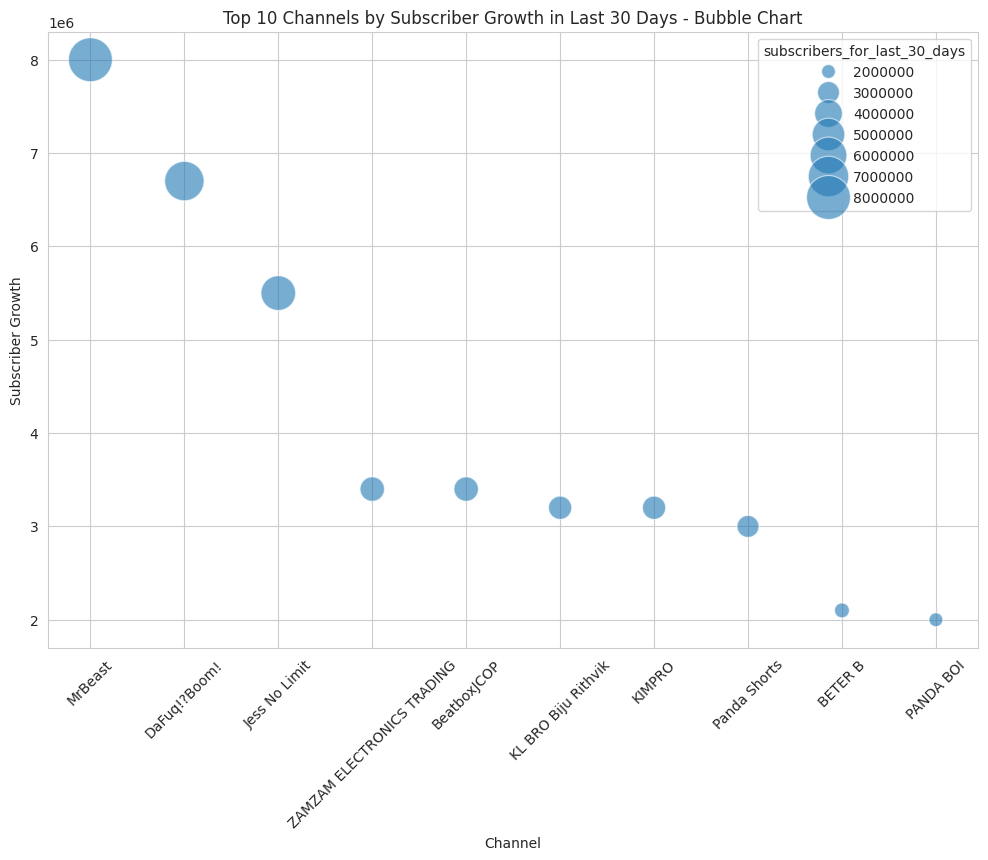

In [160]:
# 5. Top 10 Channels by Subscriber Growth in Last 30 Days
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Youtuber', y='subscribers_for_last_30_days', data=df.sort_values(by='subscribers_for_last_30_days', ascending=False).head(10), size='subscribers_for_last_30_days', sizes=(100, 1000), alpha=0.6, palette="cubehelix")
plt.title('Top 10 Channels by Subscriber Growth in Last 30 Days - Bubble Chart')
plt.xlabel('Channel')
plt.ylabel('Subscriber Growth')
plt.xticks(rotation=45)
plt.show()

<ipython-input-161-20a5d3f4b6e2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Youtuber', y='uploads', data=df.sort_values(by='uploads', ascending=False).head(10), size='uploads', sizes=(100, 1000), alpha=0.6, palette="tab10")


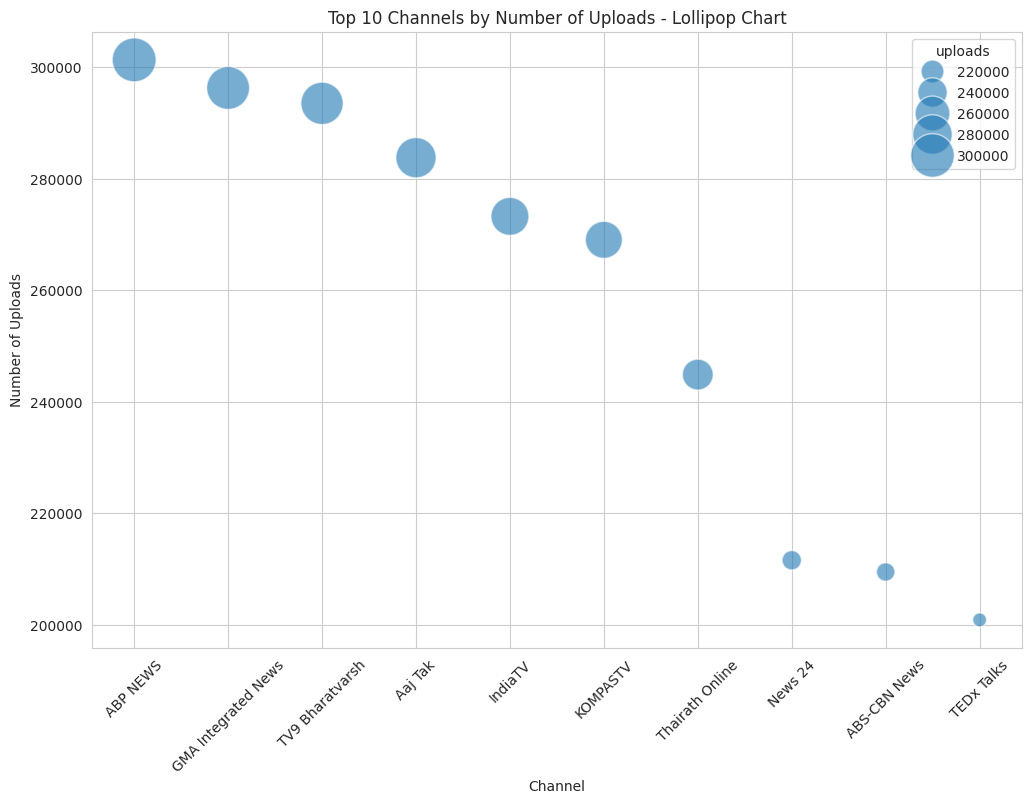

In [161]:
# 6. Top 10 Channels by Number of Uploads
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Youtuber', y='uploads', data=df.sort_values(by='uploads', ascending=False).head(10), size='uploads', sizes=(100, 1000), alpha=0.6, palette="tab10")
plt.title('Top 10 Channels by Number of Uploads - Lollipop Chart')
plt.xlabel('Channel')
plt.ylabel('Number of Uploads')
plt.xticks(rotation=45)
plt.show()

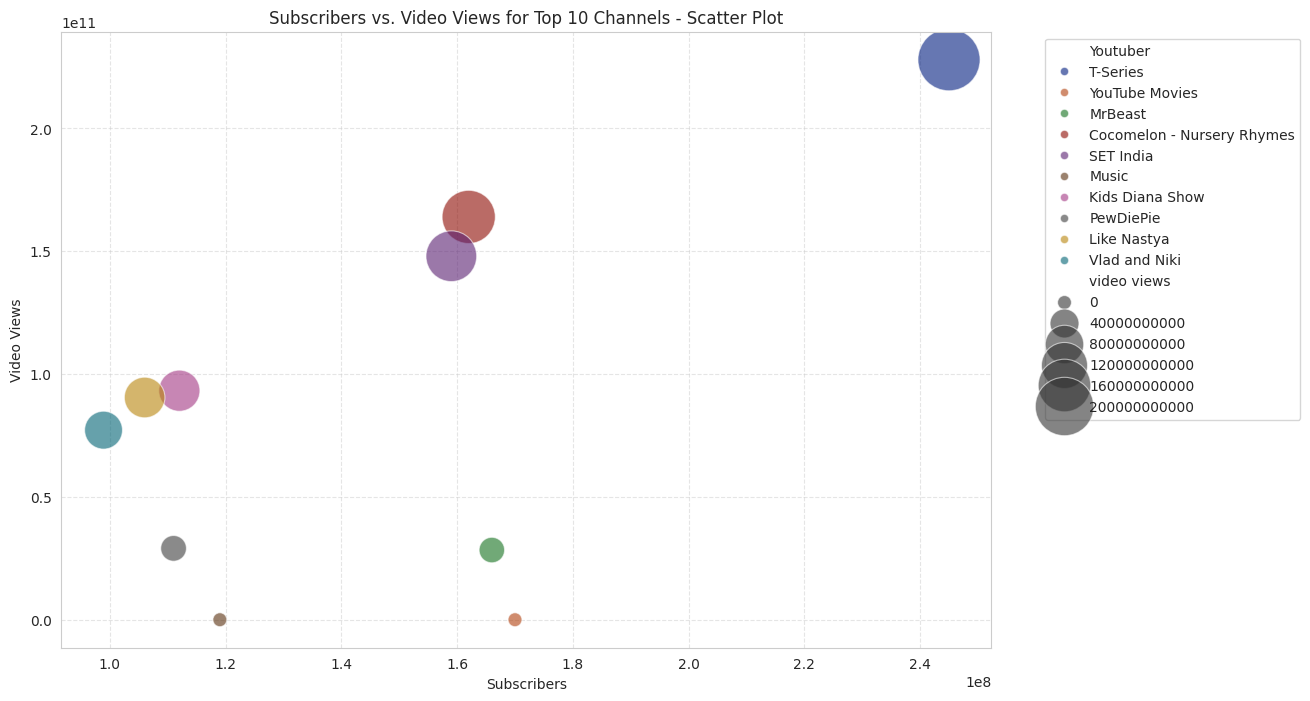

In [162]:
# 7. Subscribers vs. Video Views for Top 10 Channels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='subscribers', y='video views', size='video views', hue='Youtuber', data=df.sort_values(by='subscribers', ascending=False).head(10), sizes=(100, 2000), alpha=0.6, palette="dark")
plt.title('Subscribers vs. Video Views for Top 10 Channels - Scatter Plot')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

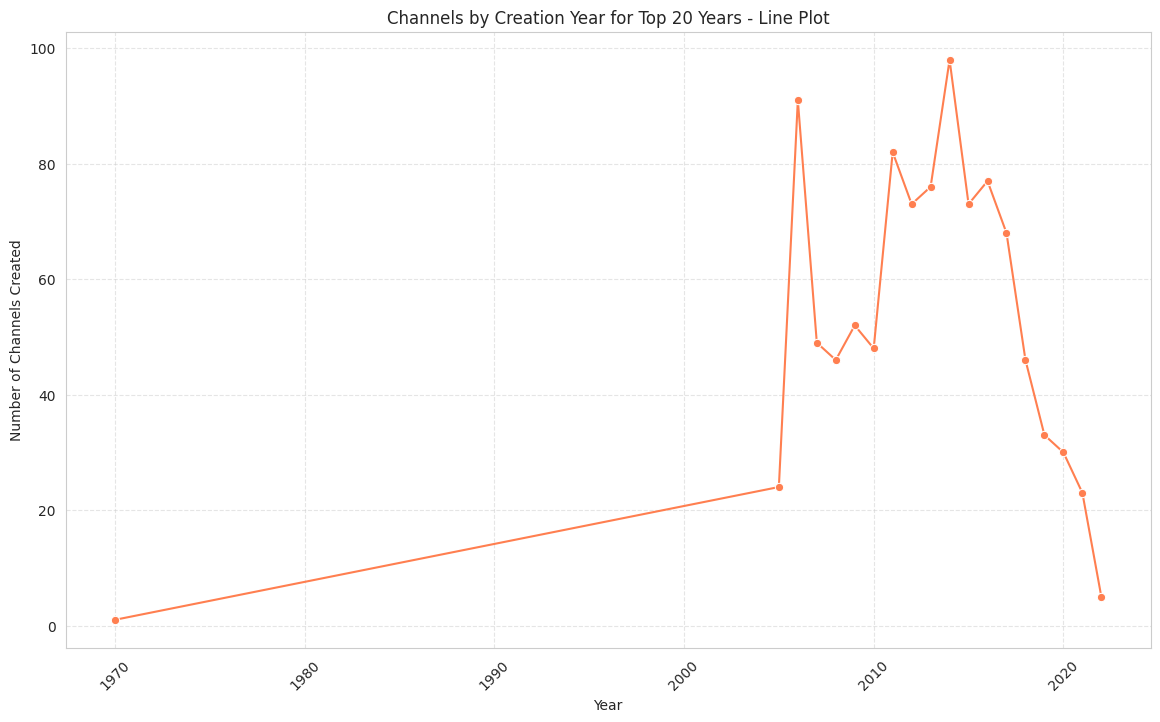

In [163]:
# 9. Channels by Creation Year for Top 20 Years
plt.figure(figsize=(14, 8))
creation_year_dist = df['created_year'].value_counts().head(20)
sns.lineplot(x=creation_year_dist.index, y=creation_year_dist.values, marker='o', color='coral')
plt.title('Channels by Creation Year for Top 20 Years - Line Plot')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()